<a href="https://colab.research.google.com/github/meherkalsi13-png/clustering_assignment/blob/main/lab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Trees and Model Stability

Trees are notorious for being **unstable**: Small changes in the data can lead to noticeable or large changes in the tree. We're going to explore this phenomenon, and a common rebuttal.

In the folder for this lab, there are three datasets that we used in class: Divorce, heart failure, and the AirBnB price dataset.

1. Pick one of the datasets and appropriately clean it.
2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make.
3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make.

Typically, you would see the trees changing what appears to be a non-trivial amount, while the linear model coefficients don't vary nearly as much. Often, the changes appear substantial.

But are they?

4. Instead of focusing on the tree or model coefficients, do three things:
    1. Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
    2. Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?
    3. Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

In [3]:
#part 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

heart = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

print("First 5 rows of the DataFrame:")
print(heart.head())

print("\nDataFrame Information:")
heart.info()

print("\nMissing values per column:")
print(heart.isnull().sum())
#No missing values and no objects in the dataset

First 5 rows of the DataFrame:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        

In [4]:
X = heart.drop('DEATH_EVENT', axis=1)
y =heart['DEATH_EVENT']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):")
print(X.head())
print("\nFirst 5 values of target (y):")
print(y.head())

Features (X) shape: (299, 12)
Target (y) shape: (299,)

First 5 rows of features (X):
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  

In [5]:
#train-test split

from sklearn.model_selection import train_test_split

random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (239, 12)
y_train shape: (239,)
X_test shape: (60, 12)
y_test shape: (60,)


In [6]:
#part 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Initialize and train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=random_seed)
dt_model.fit(X_train, y_train)

# Make predictions with Decision Tree
dt_predictions = dt_model.predict(X_test)

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=random_seed, solver='liblinear') # 'liblinear' solver for small datasets
lr_model.fit(X_train, y_train)

# Make predictions with Logistic Regression
lr_predictions = lr_model.predict(X_test)

print("Decision Tree predictions (first 5):")
print(dt_predictions[:5])
print("\nLogistic Regression predictions (first 5):")
print(lr_predictions[:5])

Decision Tree predictions (first 5):
[1 0 0 1 0]

Logistic Regression predictions (first 5):
[0 0 0 1 0]


In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

# Evaluate Logistic Regression Model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"\nLogistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Decision Tree Accuracy: 0.6333

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.58      0.44      0.50        25

    accuracy                           0.63        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.63      0.63      0.62        60


Logistic Regression Accuracy: 0.7833

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



In [8]:
#pt 3

random_seeds = [10, 20, 30, 40, 50]

dt_predictions_per_seed = []
dt_structures_per_seed = []
lr_predictions_per_seed = []
lr_coefficients_per_seed = []

print(f"Random seeds defined: {random_seeds}")
print("Empty lists initialized for storing model results per seed.")

Random seeds defined: [10, 20, 30, 40, 50]
Empty lists initialized for storing model results per seed.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

for seed in random_seeds:
    print(f"\nProcessing with random seed: {seed}")

    # 1. Train-test split
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=seed)

    # 2. Train Decision Tree Classifier
    dt_model_s = DecisionTreeClassifier(random_state=seed)
    dt_model_s.fit(X_train_s, y_train_s)
    dt_predictions_s = dt_model_s.predict(X_test_s)
    dt_predictions_per_seed.append(dt_predictions_s)

    # Store Decision Tree structure
    dt_structures_per_seed.append({
        'node_count': dt_model_s.tree_.node_count,
        'max_depth': dt_model_s.tree_.max_depth
    })
    print(f"Decision Tree: nodes={dt_model_s.tree_.node_count}, max_depth={dt_model_s.tree_.max_depth}")

    # 3. Train Logistic Regression model
    lr_model_s = LogisticRegression(random_state=seed, solver='liblinear', max_iter=1000)
    lr_model_s.fit(X_train_s, y_train_s)
    lr_predictions_s = lr_model_s.predict(X_test_s)
    lr_predictions_per_seed.append(lr_predictions_s)

    # Store Logistic Regression coefficients
    lr_coefficients_per_seed.append({
        'coefficients': lr_model_s.coef_,
        'intercept': lr_model_s.intercept_
    })

print("\nModel training and prediction storage complete for all seeds.")



Processing with random seed: 10
Decision Tree: nodes=63, max_depth=8

Processing with random seed: 20
Decision Tree: nodes=69, max_depth=9

Processing with random seed: 30
Decision Tree: nodes=69, max_depth=9

Processing with random seed: 40
Decision Tree: nodes=69, max_depth=8

Processing with random seed: 50
Decision Tree: nodes=61, max_depth=9

Model training and prediction storage complete for all seeds.


In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

print("--- Model Accuracies per Seed ---")
for i, seed in enumerate(random_seeds):
    # train-test split
    X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Get predictions for the current seed
    dt_preds = dt_predictions_per_seed[i]
    lr_preds = lr_predictions_per_seed[i]

    # Calculate accuracies
    dt_acc = accuracy_score(y_test_s, dt_preds)
    lr_acc = accuracy_score(y_test_s, lr_preds)

    print(f"\nSeed {seed}:")
    print(f"  Decision Tree Accuracy: {dt_acc:.4f}")
    print(classification_report(y_test, dt_preds))

    print(f"  Logistic Regression Accuracy: {lr_acc:.4f}")
    print(classification_report(y_test, lr_preds))



--- Model Accuracies per Seed ---

Seed 10:
  Decision Tree Accuracy: 0.7667
              precision    recall  f1-score   support

           0       0.54      0.63      0.58        35
           1       0.32      0.24      0.27        25

    accuracy                           0.47        60
   macro avg       0.43      0.43      0.43        60
weighted avg       0.44      0.47      0.45        60

  Logistic Regression Accuracy: 0.8167
              precision    recall  f1-score   support

           0       0.64      0.80      0.71        35
           1       0.56      0.36      0.44        25

    accuracy                           0.62        60
   macro avg       0.60      0.58      0.57        60
weighted avg       0.61      0.62      0.60        60


Seed 20:
  Decision Tree Accuracy: 0.7167
              precision    recall  f1-score   support

           0       0.63      0.69      0.66        35
           1       0.50      0.44      0.47        25

    accuracy           

4.1: Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
   

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#restablish the base model predictions and test set from question 2 (random_seed = 42) ---
random_seed_q2 = 42
X_train_q2, X_test_qq2, y_train_q2, y_test_q2 = train_test_split(X, y, test_size=0.2, random_state=random_seed_q2)

#tree
dt_model_q2 = DecisionTreeClassifier(random_state=random_seed_q2)
dt_model_q2.fit(X_train_q2, y_train_q2)
dt_predictions_q2 = dt_model_q2.predict(X_test_qq2)

#logistic regressions
lr_model_q2 = LogisticRegression(random_state=random_seed_q2, solver='liblinear', max_iter=1000)
lr_model_q2.fit(X_train_q2, y_train_q2)
lr_predictions_q2 = lr_model_q2.predict(X_test_qq2)

print(f"Base predictions (seed {random_seed_q2}) generated on test set of size {len(X_test_qq2)}.")

Base predictions (seed 42) generated on test set of size 60.


In [23]:
#get part 3 prediction
dt_alt_predictions_on_base_X_test = []
lr_alt_predictions_on_base_X_test = []

random_seeds_part3 = [10, 20, 30, 40, 50]

for seed in random_seeds_part3:

    # Train-test split for the alternative model training (using the current seed)
    # We only need X_train_alt, y_train_alt for training the alternative model
    X_train_alt, _, y_train_alt, _ = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Train Decision Tree Classifier for the alternative seed
    dt_model_alt = DecisionTreeClassifier(random_state=seed)
    dt_model_alt.fit(X_train_alt, y_train_alt)
    # Predict on the base X_test (from random_seed=42) using the alternative model
    dt_alt_predictions_on_base_X_test.append(dt_model_alt.predict(X_test_qq2))

    # Train Logistic Regression model for the alternative seed
    lr_model_alt = LogisticRegression(random_state=seed, solver='liblinear', max_iter=1000)
    lr_model_alt.fit(X_train_alt, y_train_alt)
    # Predict on the base X_test (from random_seed=42) using the alternative model
    lr_alt_predictions_on_base_X_test.append(lr_model_alt.predict(X_test_qq2))

print("done")

Generating predictions from alternative models on the base test set (from random_seed=42)...
  Processing alternative model with random seed: 10
  Processing alternative model with random seed: 20
  Processing alternative model with random seed: 30
  Processing alternative model with random seed: 40
  Processing alternative model with random seed: 50
Finished generating predictions from alternative models.


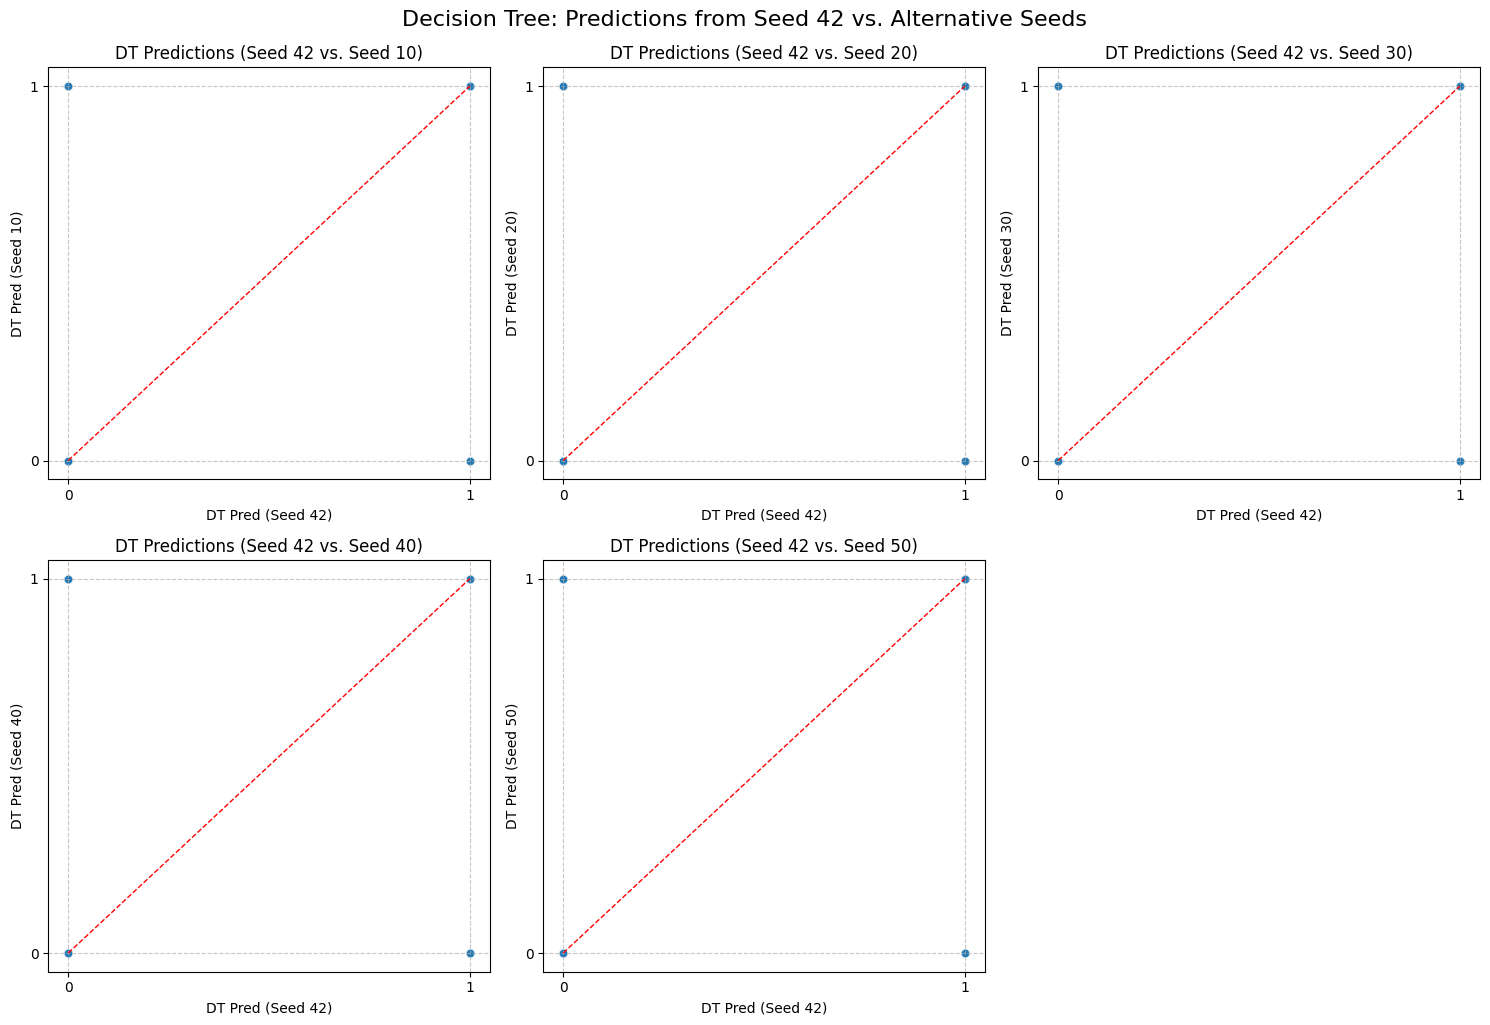

In [28]:
#decision tree scatterplot

plt.figure(figsize=(15, 10))
for i, seed in enumerate(random_seeds_part3):
    plt.subplot(2, 3, i + 1) # Create a 2x3 grid of plots
    sns.scatterplot(x=dt_predictions_q2, y=dt_alt_predictions_on_base_X_test[i], alpha=0.6)
    plt.title(f'DT Predictions (Seed 42 vs. Seed {seed})')
    plt.xlabel('DT Pred (Seed 42)')
    plt.ylabel(f'DT Pred (Seed {seed})')
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.grid(True, linestyle='--', alpha=0.7)
    # Add a diagonal line for perfect agreement
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.suptitle('Decision Tree: Predictions from Seed 42 vs. Alternative Seeds', y=1.02, fontsize=16)
plt.show()

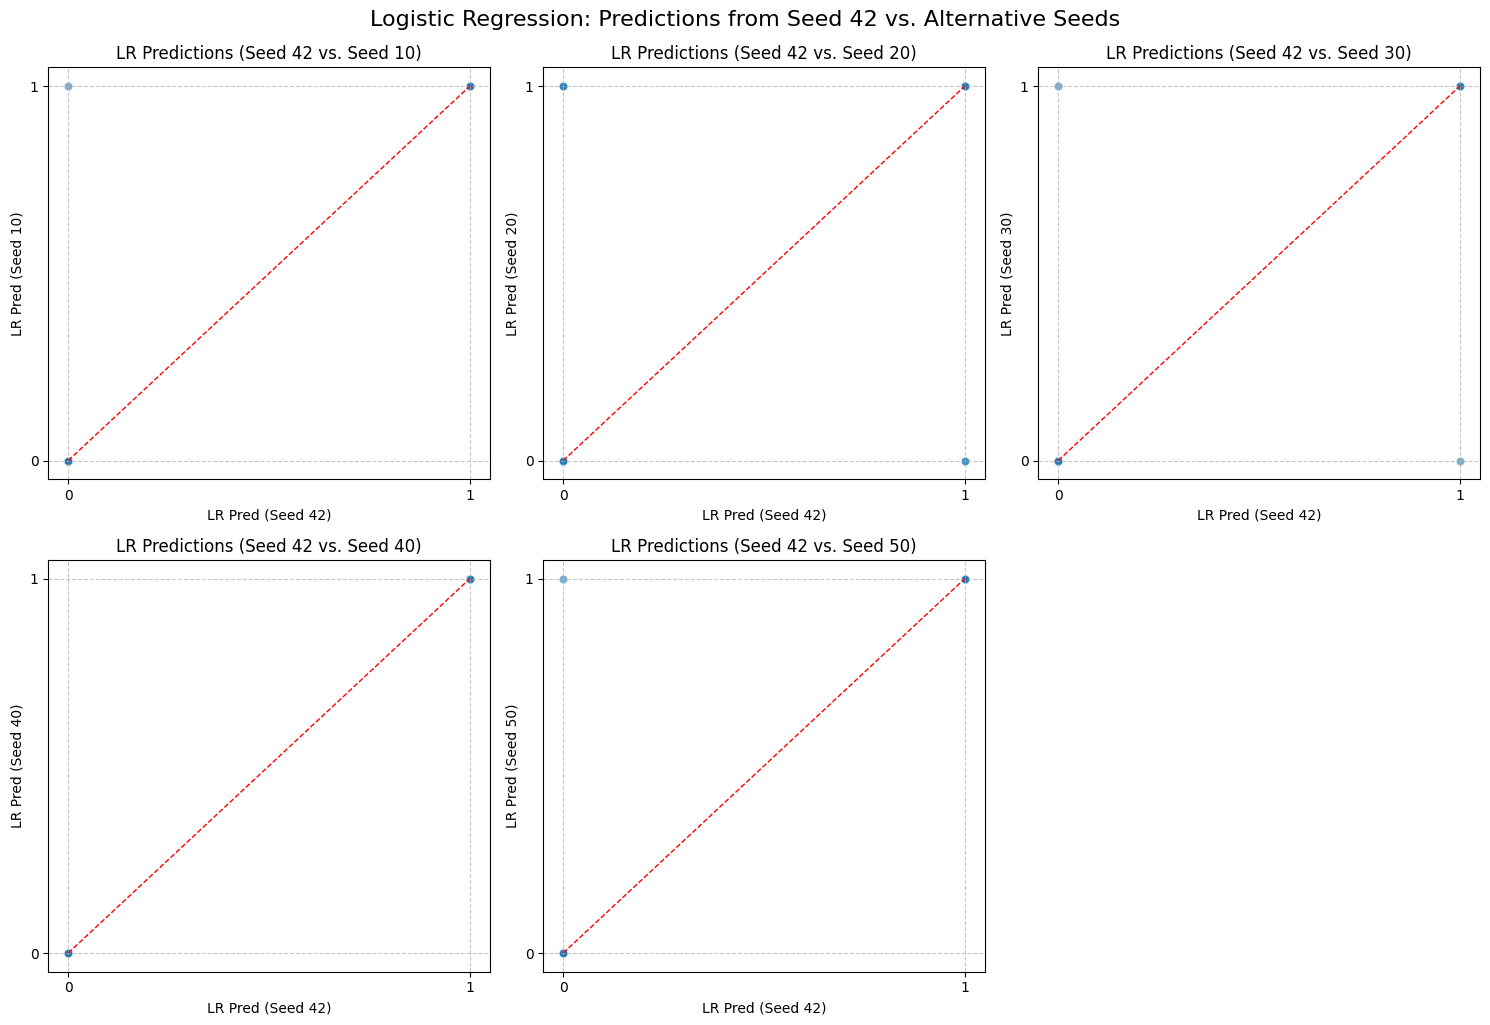

In [21]:
#logisitc reg scatterplot
plt.figure(figsize=(15, 10))
for i, seed in enumerate(random_seeds_part3):
    plt.subplot(2, 3, i + 1) # Create a 2x3 grid of plots
    sns.scatterplot(x=lr_predictions_q2, y=lr_alt_predictions_on_base_X_test[i], alpha=0.6)
    plt.title(f'LR Predictions (Seed 42 vs. Seed {seed})')
    plt.xlabel('LR Pred (Seed 42)')
    plt.ylabel(f'LR Pred (Seed {seed})')
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.grid(True, linestyle='--', alpha=0.7)
    # Add a diagonal line for perfect agreement
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.suptitle('Logistic Regression: Predictions from Seed 42 vs. Alternative Seeds', y=1.02, fontsize=16)
plt.show()

4.2: Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?

Only logistic regression models seem to be highly correlated (above 0.8). All decision tree correlatins are fairly low.


In [29]:
import numpy as np
from scipy.stats import pearsonr

# --- Calculate correlations for Decision Trees ---
print("--- Decision Tree Prediction Correlations (Base Seed 42 vs. Alternative Seeds) ---")
dt_correlations = []
for i, seed in enumerate(random_seeds_part3):
    # Pearson correlation coefficient between two binary variables is equivalent to phi coefficient
    # It measures the association between two binary variables
    correlation, _ = pearsonr(dt_predictions_q2, dt_alt_predictions_on_base_X_test[i])
    dt_correlations.append(correlation)
    print(f"  Seed 42 vs. Seed {seed}: {correlation:.4f}")

print("\n--- Logistic Regression Prediction Correlations (Base Seed 42 vs. Alternative Seeds) ---")
lr_correlations = []
for i, seed in enumerate(random_seeds_part3):
    correlation, _ = pearsonr(lr_predictions_q2, lr_alt_predictions_on_base_X_test[i])
    lr_correlations.append(correlation)
    print(f"  Seed 42 vs. Seed {seed}: {correlation:.4f}")


print("\n--- Interpretation ---")
print("For both Decision Trees and Logistic Regression:")
print("- Correlations closer to 1 indicate higher similarity in predictions.")
print("- Correlations closer to 0 indicate less similarity in predictions.")

--- Decision Tree Prediction Correlations (Base Seed 42 vs. Alternative Seeds) ---
  Seed 42 vs. Seed 10: 0.3476
  Seed 42 vs. Seed 20: 0.1755
  Seed 42 vs. Seed 30: 0.4169
  Seed 42 vs. Seed 40: 0.3694
  Seed 42 vs. Seed 50: 0.1514

--- Logistic Regression Prediction Correlations (Base Seed 42 vs. Alternative Seeds) ---
  Seed 42 vs. Seed 10: 0.9591
  Seed 42 vs. Seed 20: 0.7918
  Seed 42 vs. Seed 30: 0.9148
  Seed 42 vs. Seed 40: 1.0000
  Seed 42 vs. Seed 50: 0.9591

--- Interpretation ---
For both Decision Trees and Logistic Regression:
- Correlations closer to 1 indicate higher similarity in predictions.
- Correlations closer to 0 indicate less similarity in predictions.


4.3: Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

Logistic regression intercept is close to 0 and correlation is close to 1. However, decision tree doesn't show the same pattern.




In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
#decision tree
for i, seed in enumerate(random_seeds_part3):

    base_preds_dt = dt_predictions_q2.reshape(-1, 1)
    alt_preds_dt = dt_alt_predictions_on_base_X_test[i].reshape(-1, 1)
    #fit linear regression model
    lr_model_dt = LinearRegression()
    lr_model_dt.fit(base_preds_dt, alt_preds_dt)
    intercept_dt = lr_model_dt.intercept_[0]
    slope_dt = lr_model_dt.coef_[0][0]
    r2_dt = r2_score(alt_preds_dt, lr_model_dt.predict(base_preds_dt))

    print(f"\nDecision Tree (Base Seed 42 vs. Alternative Seed {seed}):")
    print(f"  Intercept: {intercept_dt:.4f} (expected close to 0)")
    print(f"  Slope: {slope_dt:.4f} (expected close to 1)")
    print(f"  R-squared (R2): {r2_dt:.4f} (expected close to 1)")


#logistic reg
for i, seed in enumerate(random_seeds_part3):
    base_preds_lr = lr_predictions_q2.reshape(-1, 1)
    alt_preds_lr = lr_alt_predictions_on_base_X_test[i].reshape(-1, 1)
    #fit linera regressio model
    lr_model_lr = LinearRegression()
    lr_model_lr.fit(base_preds_lr, alt_preds_lr)
    intercept_lr = lr_model_lr.intercept_[0]
    slope_lr = lr_model_lr.coef_[0][0]
    r2_lr = r2_score(alt_preds_lr, lr_model_lr.predict(base_preds_lr))

    print(f"\nLogistic Regression (Base Seed 42 vs. Alternative Seed {seed}):")
    print(f"  Intercept: {intercept_lr:.4f} (expected close to 0)")
    print(f"  Slope: {slope_lr:.4f} (expected close to 1)")
    print(f"  R-squared (R2): {r2_lr:.4f} (expected close to 1)")



Decision Tree (Base Seed 42 vs. Alternative Seed 10):
  Intercept: 0.2683 (expected close to 0)
  Slope: 0.3633 (expected close to 1)
  R-squared (R2): 0.1208 (expected close to 1)

Decision Tree (Base Seed 42 vs. Alternative Seed 20):
  Intercept: 0.3415 (expected close to 0)
  Slope: 0.1849 (expected close to 1)
  R-squared (R2): 0.0308 (expected close to 1)

Decision Tree (Base Seed 42 vs. Alternative Seed 30):
  Intercept: 0.2927 (expected close to 0)
  Slope: 0.4442 (expected close to 1)
  R-squared (R2): 0.1738 (expected close to 1)

Decision Tree (Base Seed 42 vs. Alternative Seed 40):
  Intercept: 0.2927 (expected close to 0)
  Slope: 0.3915 (expected close to 1)
  R-squared (R2): 0.1365 (expected close to 1)

Decision Tree (Base Seed 42 vs. Alternative Seed 50):
  Intercept: 0.3659 (expected close to 0)
  Slope: 0.1605 (expected close to 1)
  R-squared (R2): 0.0229 (expected close to 1)

Logistic Regression (Base Seed 42 vs. Alternative Seed 10):
  Intercept: 0.0227 (expected